# Continuous Control using Deep Reinforcement Learning

---

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='.\Reacher_Windows_x86_64_20agents\Reacher')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

Once this cell is executed, we will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  



In [5]:
# from  collections  import deque
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)
# # initialize the score (for each agent)
# scores_window = deque(maxlen=100)  # last 100 scores

# for i in range(100):
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     scores_window.append(scores)                        # save most recent score
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. Training the Agent
When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
from  collections  import deque
from itertools import count
import torch
import time
import matplotlib.pyplot as plt
from ddpg_agent import Agent
from ddpg_network import Actor, Critic
%matplotlib inline
env_info = env.reset(train_mode=True)[brain_name]
agent = Agent(state_size=state_size, action_size=action_size,num_agents=num_agents, random_seed=0)

Created an Actor and a Critic 
 Actor(
  (fc1): Linear(in_features=33, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
) Critic(
  (fcs1): Linear(in_features=33, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=260, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)


In [8]:
def ddpg(n_episodes=100, max_t=1000):
    log_5=True
    log_15=True
    log_final=True
    scores = []                        # list containing scores from each episode
    scores_std = []
    scores_mean = []
    scores_window = deque(maxlen=100)
    final_episode=n_episodes
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        for t in range(max_t):

            action = agent.act(state, add_noise=True)
           #Take action and observe reward and next state
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations      # get the next state
            reward = env_info.rewards                      # get the reward
            done = env_info.local_done                     # see if episode has finished               
            #Store experience tuple (s,a,s',r) in replay memory and learn from minibatch
            # Unpack experience for all agents      
            for state_agent, action_agent, reward_agent, next_state_agent, done_agent in zip(state, action, reward, next_state, done):          
                agent.step(state_agent, action_agent, reward_agent, next_state_agent, done_agent)
            state = next_state
            score += reward
            if np.any(done):
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        scores_mean.append(np.mean(scores_window))
        scores_std.append(np.std(scores_window))  
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode%5==0:
            print('\n Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if np.mean(scores_window)>30:
            break

    return scores



In [9]:
%%time
scores = ddpg()
env.close()


Episode 5	Average Score: 1.69
Episode 10	Average Score: 3.54
Episode 15	Average Score: 5.614
Episode 20	Average Score: 7.361
Episode 25	Average Score: 9.296
Episode 30	Average Score: 11.12
Episode 35	Average Score: 13.342
Episode 40	Average Score: 15.704
Episode 45	Average Score: 17.940
Episode 50	Average Score: 19.904
Episode 55	Average Score: 21.560
Episode 60	Average Score: 23.016
Episode 65	Average Score: 24.251
Episode 70	Average Score: 25.325
Episode 75	Average Score: 26.222
Episode 80	Average Score: 26.982
Episode 85	Average Score: 27.638
Episode 90	Average Score: 28.223
Episode 95	Average Score: 28.762
Episode 100	Average Score: 29.23
 Episode 100	Average Score: 29.23Wall time: 4h 23min 28s


In [10]:
#Save scores
np.save('DDPG_scores.npy', np.array(scores))


Text(0.5, 1.0, 'DDPG')

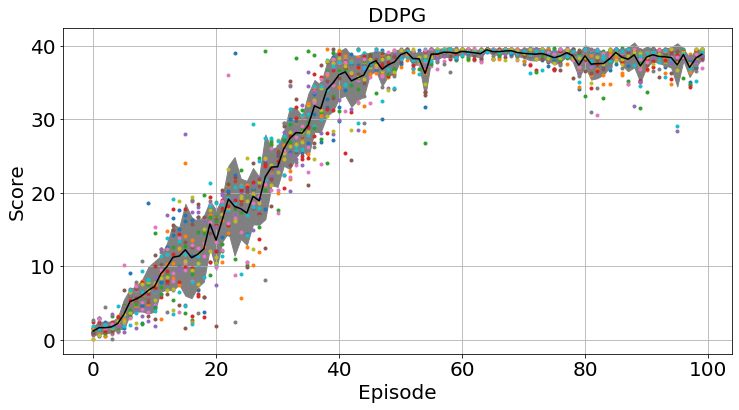

In [11]:
import matplotlib.pyplot as plt
import numpy as np

scores = np.load('DDPG_scores.npy')
scores=np.asarray(scores)
means = np.mean(scores,axis=1)
std  = np.std(scores,axis=1)

plt.figure(figsize=(12,6))
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.plot(scores,'.')
plt.plot(means,'k-')
plt.fill_between(range(len(means)), means-std, means+std, color='gray')
plt.grid()
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('DDPG')